# Explorando Gráficos Seaborn (II)
Author: *Francisco Javier Navarro Barrón*

La idea principal de Seaborn es que proporciona comandos de alto nivel para crear una variedad de tipos de gráficos útiles para la exploración de datos estadísticos e incluso para el ajuste de algunos modelos estadísticos.

Echemos un vistazo a algunos de los conjuntos de datos y tipos de gráficos disponibles en Seaborn. Ten en cuenta que todo lo siguiente podría hacerse utilizando comandos Matplotlib sin procesar (esto es, de hecho, lo que Seaborn realiza *under-the-hood*), pero con la API de Seaborn es mucho más conveniente.


**Recursos recomendados:**
* https://images.datacamp.com/image/upload/v1676302629/Marketing/Blog/Seaborn_Cheat_Sheet.pdf
* https://www.kaggle.com/code/themlphdstudent/cheat-sheet-seaborn-charts


In [ ]:
import seaborn as sns
%matplotlib inline
sns.set() # sobre escribimos parámetros de visualización

df = sns.load_dataset('penguins')
df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


In [ ]:
# Here’s the available datasets we can import from seaborn:
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

## Seaborn figure styles

Hay cinco temas preestablecidos de **Seaborn**: `darkgrid`, `whitegrid`, `dark`, `white` y `ticks`. Cada uno de ellos se adapta a diferentes aplicaciones y preferencias personales. El tema predeterminado es `darkgrid`.

<Axes: >

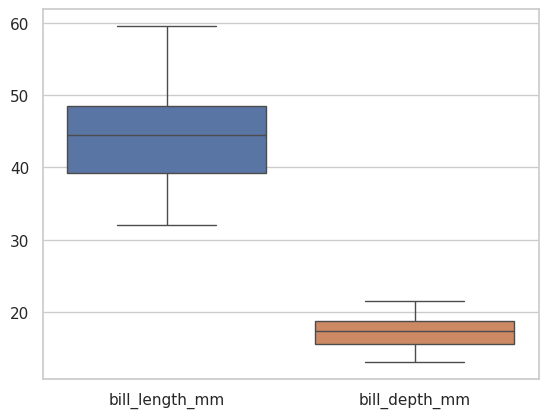

In [ ]:
sns.set_style("whitegrid")
sns.boxplot(data=df[['bill_length_mm', 'bill_depth_mm']])

Aunque es fácil cambiar de un estilo a otro, también puedes usar la función `axes_style()` en una declaración `with` para establecer temporalmente los parámetros del gráfico:

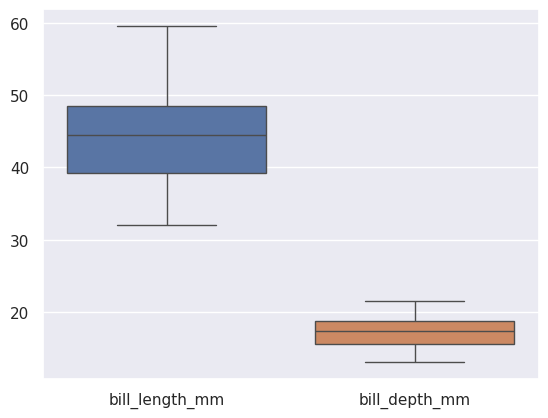

In [ ]:
with sns.axes_style('darkgrid'): # solamente aqui se usa el estilo darkgrid
  sns.boxplot(data=df[['bill_length_mm', 'bill_depth_mm']])

## Subplots
Es posible agregar distintos gráficos simples a un *grid* mediante un objeto `gridspec`:

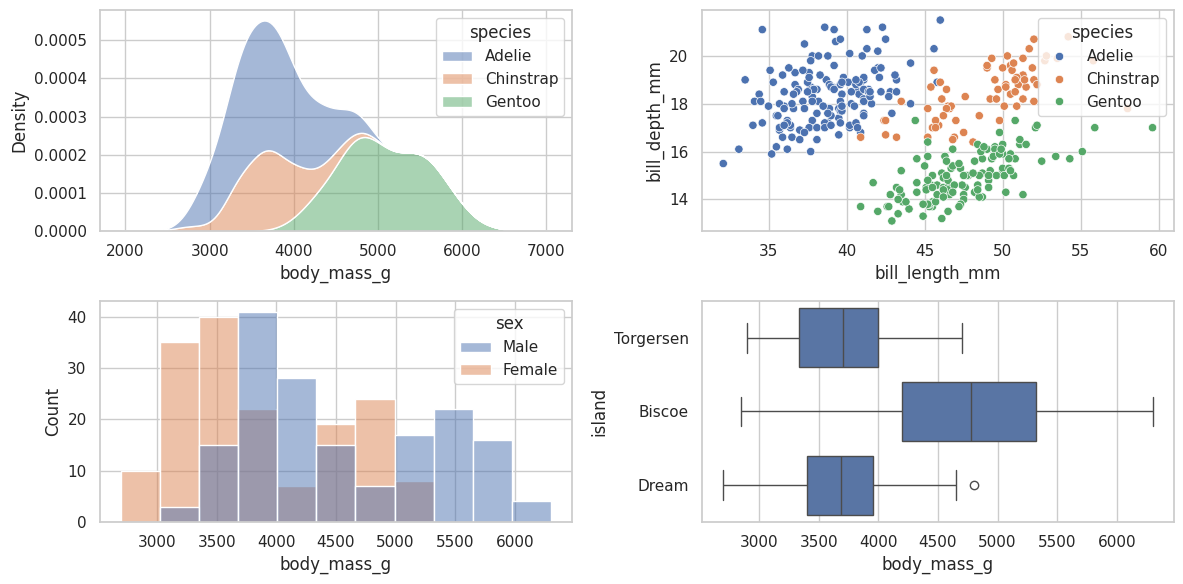

In [ ]:
import matplotlib.pyplot as plt

f = plt.figure(figsize=(12, 6)) # creamos una figura con matplotlib
gs = f.add_gridspec(2, 2) # grid de 2 x 2

ax1 = f.add_subplot(gs[0, 0])
sns.kdeplot(data=df, x="body_mass_g", hue="species", multiple="stack", alpha=0.5, ax=ax1)

ax2 = f.add_subplot(gs[0, 1])
sns.scatterplot(x='bill_length_mm', y='bill_depth_mm', hue="species", data=df, ax=ax2)

ax3 = f.add_subplot(gs[1, 0]) # fila 1, col 0
sns.histplot(x='body_mass_g', hue='sex', data=df, ax=ax3)

ax4 = f.add_subplot(gs[1, 1])
sns.boxplot(x='body_mass_g', y='island',data=df, ax=ax4)

f.tight_layout()

Nota que todos los objetos usan el mismo estilo, sin embargo se pueden usar estilos diferentes usando la funcion `with sns.axes_style(<style>)`:

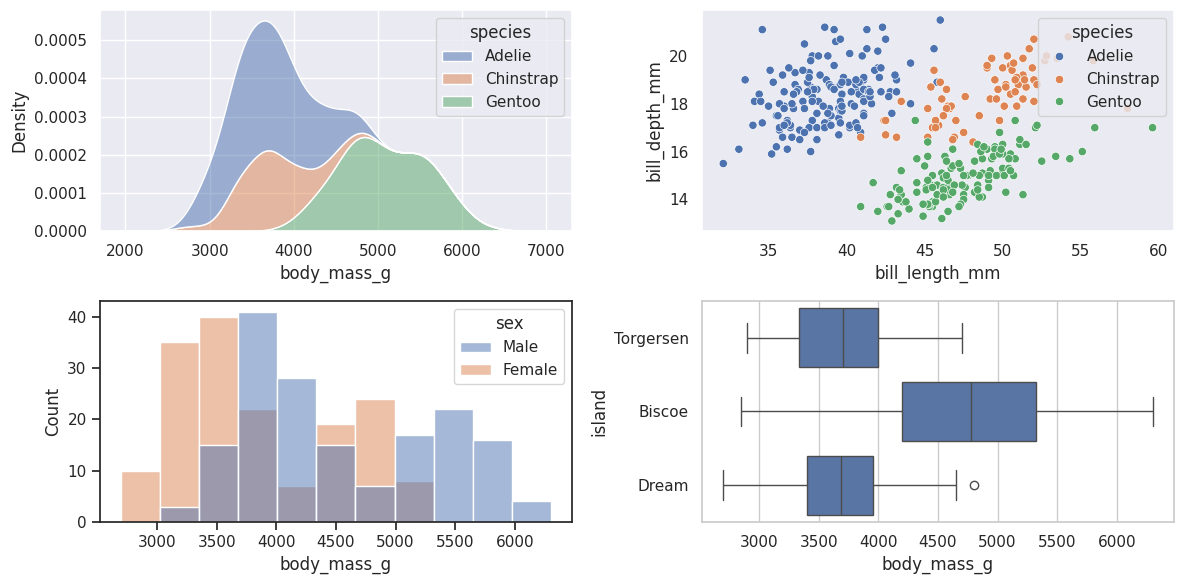

In [ ]:
f = plt.figure(figsize=(12, 6))
gs = f.add_gridspec(2, 2) # grid de 2 x 2

with sns.axes_style("darkgrid"):
  ax = f.add_subplot(gs[0, 0])
  sns.kdeplot(data=df, x="body_mass_g", hue="species", multiple="stack", alpha=0.5, ax=ax)

with sns.axes_style("dark"):
  ax = f.add_subplot(gs[0, 1])
  sns.scatterplot(x='bill_length_mm', y='bill_depth_mm', hue="species", data=df, ax=ax)

with sns.axes_style("ticks"):
  ax = f.add_subplot(gs[1, 0])
  sns.histplot(x='body_mass_g', hue='sex', data=df, ax=ax)

with sns.axes_style("whitegrid"):
  ax = f.add_subplot(gs[1, 1])
  sns.boxplot(x='body_mass_g', y='island', data=df, ax=ax)

f.tight_layout()

## Usando contextos
Un conjunto separado de parámetros controla la escala de los elementos de los gráficos, lo que permite usar el mismo código para crear tramas que sean adecuadas para su uso en entornos donde las gráficas más grandes o más pequeñas son apropiadas.

Los cuatro contextos preestablecidos, en orden de tamaño relativo, son:
* `paper`
* `notebook`
* `talk`
* `poster`

El estilo `notebook` es el predeterminado y se utilizó en los gráficos anteriores pero podemos cambiarlo con: `sns.set_context(<context>)`

In [ ]:
import pandas as pd

hr = pd.read_csv('HRDataset_v14.csv')
hr['DateofHire'] = pd.to_datetime(hr['DateofHire'])
hr.head(2)

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,...,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences
0,"Adinolfi, Wilson K",10026,0,0,1,1,5,4,0,62506,...,Michael Albert,22.0,LinkedIn,Exceeds,4.60,5,0,1/17/2019,0,1
1,"Ait Sidi, Karthikeyan",10084,1,1,1,5,3,3,0,104437,...,Simon Roup,4.0,Indeed,Fully Meets,4.96,3,6,2/24/2016,0,17


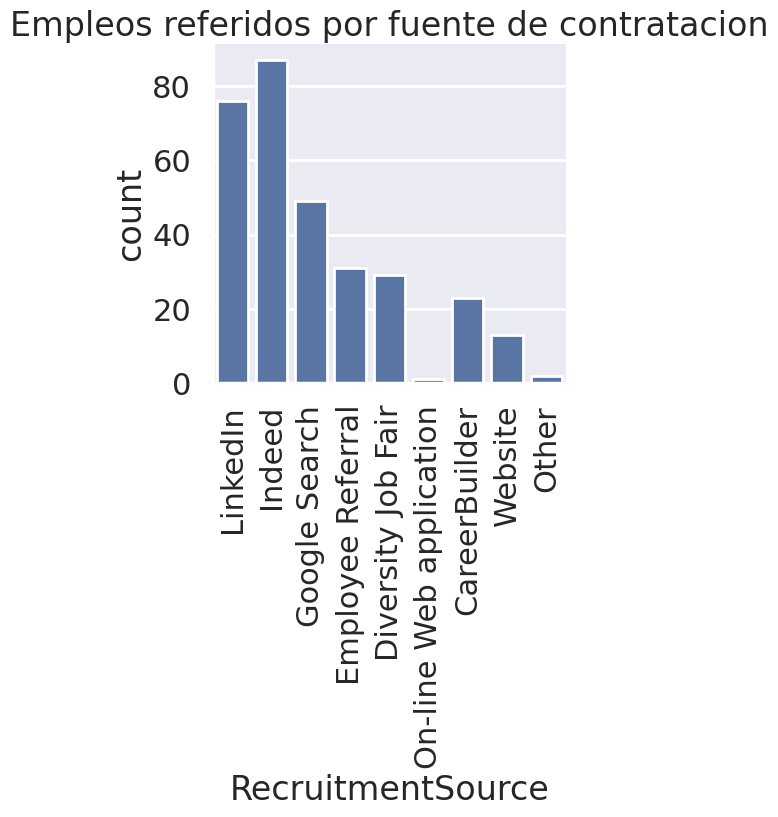

In [ ]:
# cuantos empleos se han referido por fuente de contratacion? - contexto notebook
sns.set(rc={"figure.figsize":(16, 4)})
sns.set_context('poster')
ax = sns.catplot(data=hr, x='RecruitmentSource', kind='count')
ax.set_xticklabels(rotation=90)
ax.set(title='Empleos referidos por fuente de contratacion')

In [ ]:
hr.DateofHire.value_counts()

,count
DateofHire,
2011-01-10,14
2015-03-30,12
2015-01-05,11
2014-09-29,11
2011-07-05,10
...,...
2011-03-07,1
2012-07-09,1
2016-01-05,1


<Axes: xlabel='DateofHire', ylabel='Salary'>

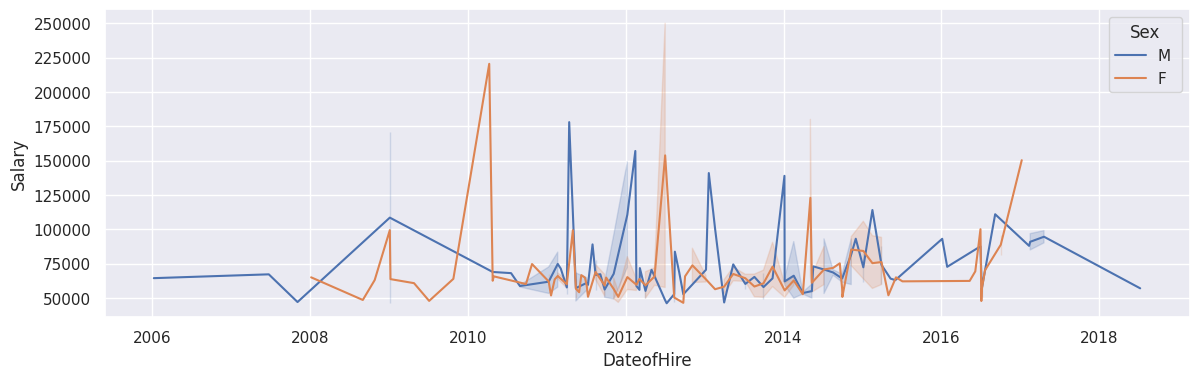

In [ ]:
# hirings throughout the years by sex
sns.set(rc={"figure.figsize":(14, 4)})
sns.set_context('notebook') # default
sns.lineplot(x='DateofHire', y='Salary', data=hr, hue='Sex') #errorbar=None, variability around the line

In [ ]:
# Load the example dataset
tips = sns.load_dataset("tips")
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


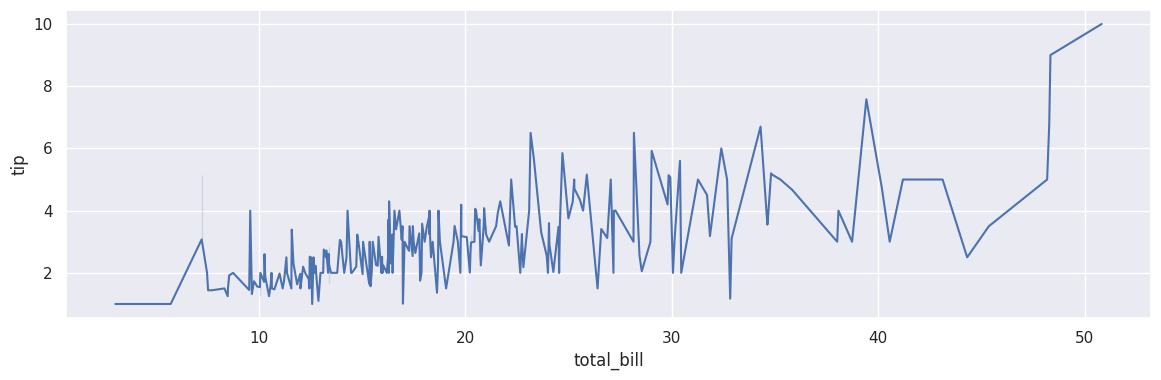

In [ ]:
# Create a line plot
sns.lineplot(x="total_bill", y="tip", data=tips, errorbar=('ci', 50))
plt.show()

<Axes: xlabel='DateofHire', ylabel='Salary'>

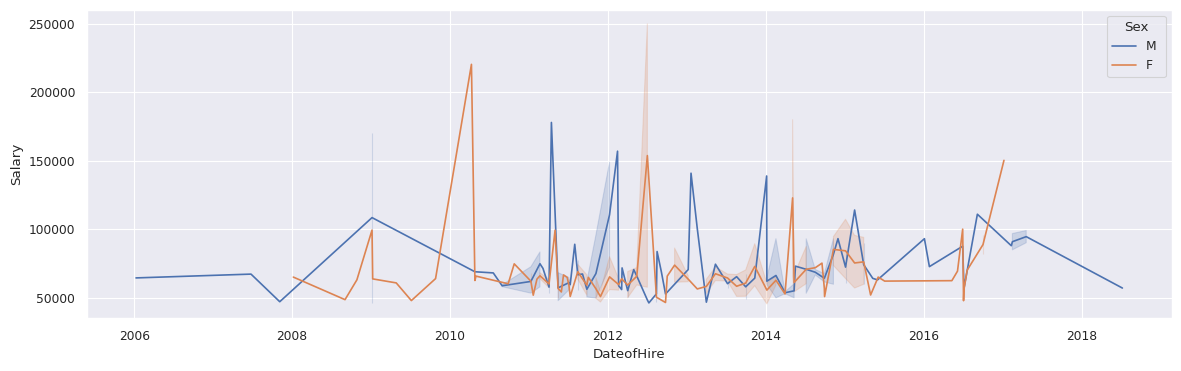

In [ ]:
sns.set_context('paper')
sns.lineplot(x='DateofHire', y='Salary', data=hr, hue='Sex')

<Axes: xlabel='DateofHire', ylabel='Salary'>

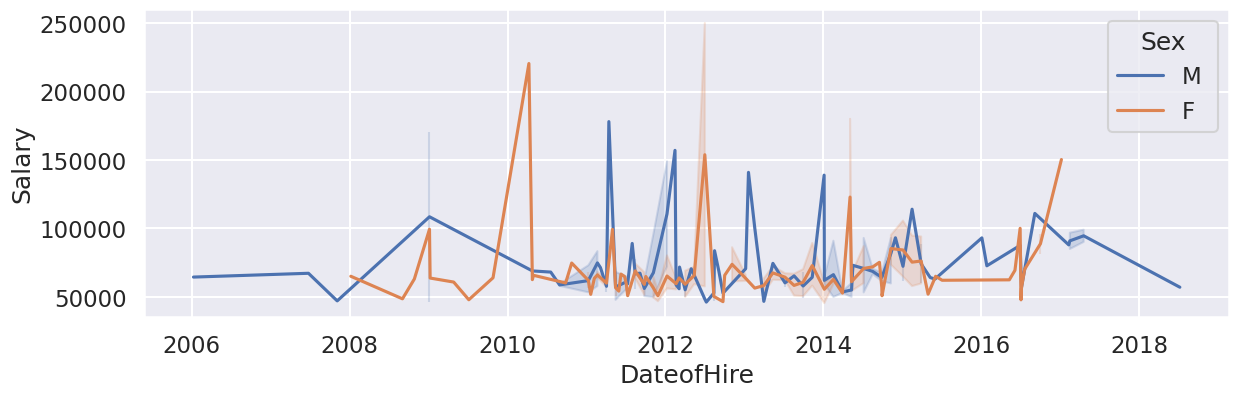

In [ ]:
sns.set_context('talk')
sns.lineplot(x='DateofHire', y='Salary', data=hr, hue='Sex')

<Axes: xlabel='DateofHire', ylabel='Salary'>

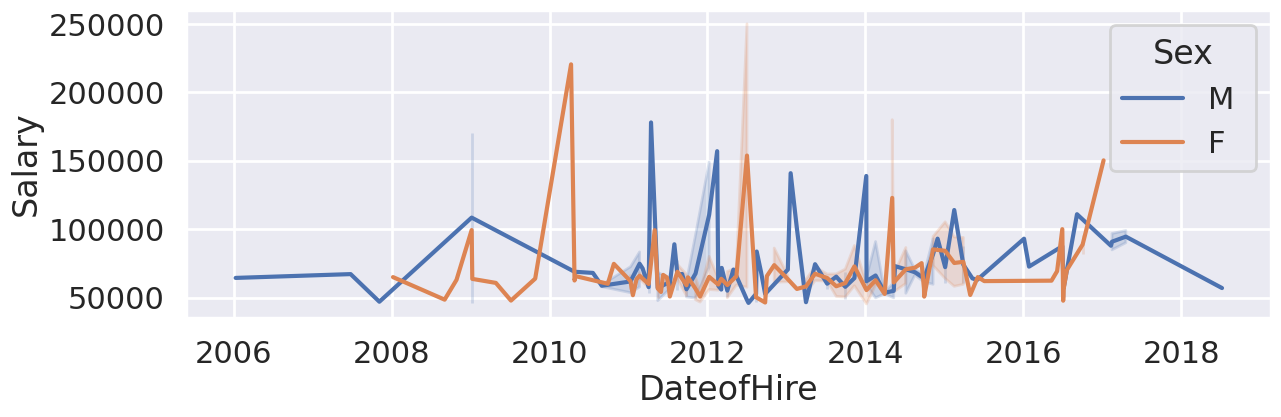

In [ ]:
sns.set_context('poster')
sns.lineplot(x='DateofHire', y='Salary', data=hr, hue='Sex')

NOTA: Toma en cuenta que estos cambios afectarán a los gráficos que realices sucesivamente.

Finalmente, el tamaño de los elementos se pueden escalar de forma independiente al cambiar el contexto. Por ejemplo:

<Axes: xlabel='DateofHire', ylabel='Salary'>

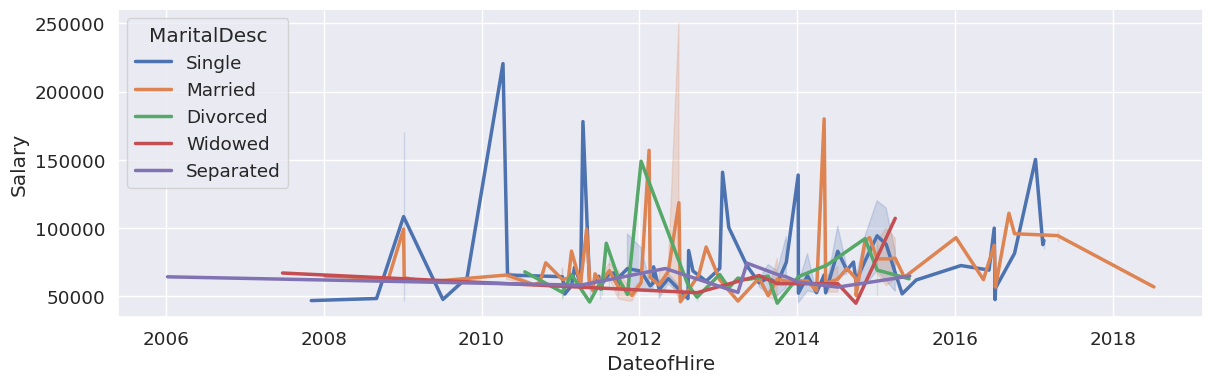

In [ ]:
sns.set_context("notebook", font_scale=1.2, rc={"lines.linewidth": 2.5})
sns.lineplot(x='DateofHire', y='Salary', data=hr, hue='MaritalDesc')

In [ ]:
sns.set() # reset

# Distribuciones de variables
A menudo, en la visualización de datos estadísticos, se necesita graficar **histogramas** y **distribuciones conjuntas** de variables.

## Distribution plot
La función `displot()` de Seaborn admite varios enfoques para visualizar distribuciones. Estos incluyen técnicas clásicas como los histogramas y enfoques computacionalmente intensivos como la estimación de la densidad del kernel (*Kernel Density Estimation*):

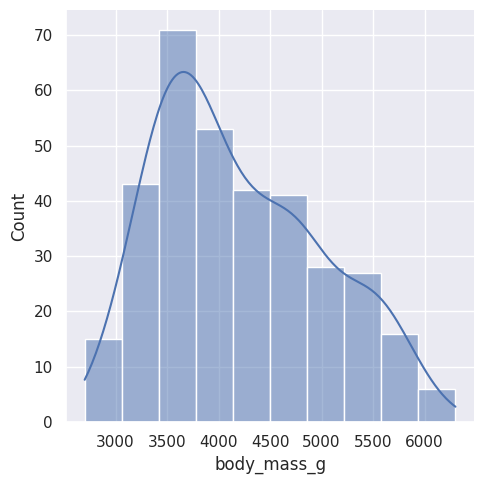

In [ ]:
sns.displot(data=df, x='body_mass_g', bins=10, kde=True)

Al asignar una variable **categórica** al argumento `hue` se graficará un histograma para cada grupo único distinguiéndose por color:

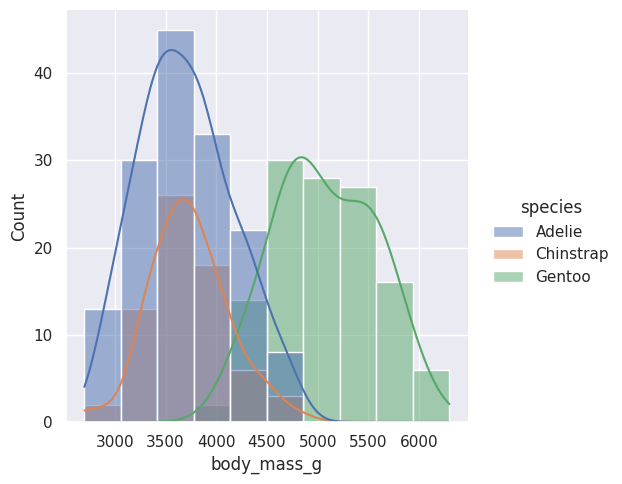

In [ ]:
sns.displot(data=df, x='body_mass_g', hue='species', bins=10, kde=True)

De forma predeterminada, los diferentes histogramas están "superpuestos" entre sí y, en algunos casos, pueden ser difíciles de distinguir. Una opción es cambiar la representación visual del histograma de un gráfico de barras a un gráfico de "pasos":

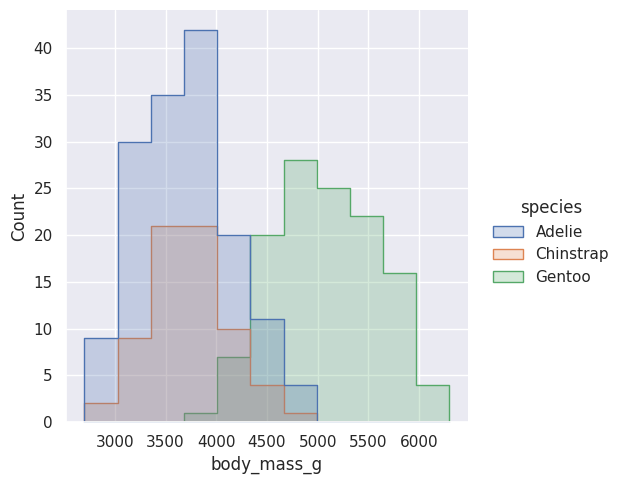

In [ ]:
sns.displot(df, x="body_mass_g", hue="species", element="step")

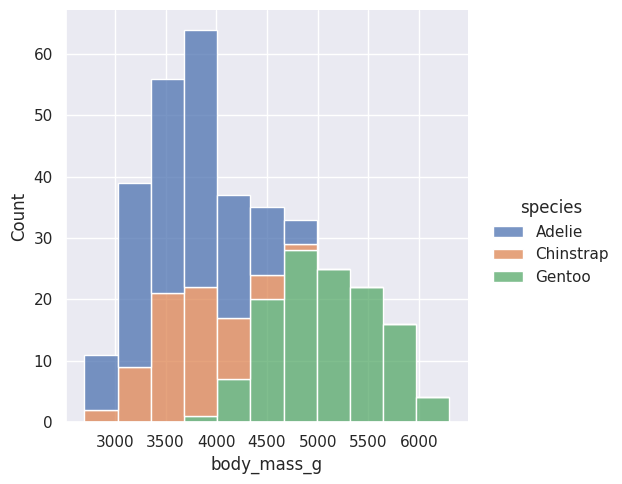

In [ ]:
# This option is used for stacking layered bins
sns.displot(df, x="body_mass_g", hue="species", multiple='stack')

# Joint Plots
Podemos usar `sns.jointplot` para mostrar la **distribución conjunta** entre diferentes variables, junto con las distribuciones marginales asociadas. Hay varias opciones disponibles, por ejemplo, podríamos usar el **joint plot** para incluso hacer una estimación automática de la densidad del kernel y regresión.

Utilizaremos otro conjunto de datos también disponible en Seaborn.

In [ ]:
crash_df = sns.load_dataset('car_crashes')
crash_df.head()

,total,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses,abbrev
0,18.8,7.332,5.640,18.048,15.040,784.55,145.08,AL
1,18.1,7.421,4.525,16.290,17.014,1053.48,133.93,AK
2,18.6,6.510,5.208,15.624,17.856,899.47,110.35,AZ
3,22.4,4.032,5.824,21.056,21.280,827.34,142.39,AR
4,12.0,4.200,3.360,10.920,10.680,878.41,165.63,CA


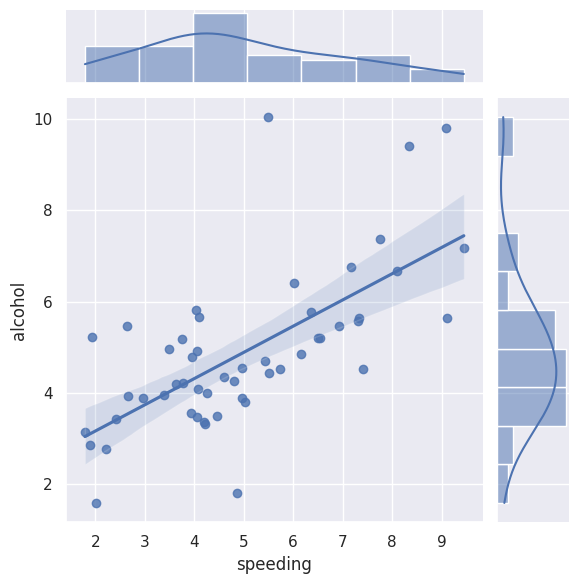

In [ ]:
# Used to compare two distributions
sns.jointplot(x='speeding', y='alcohol', data=crash_df, kind='reg')

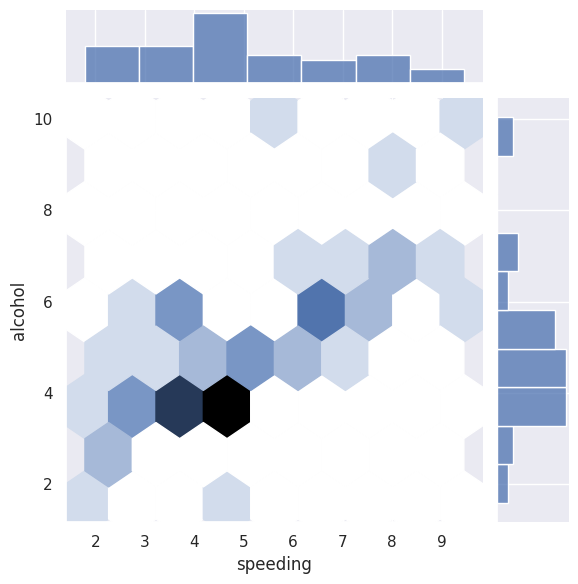

In [ ]:
# Podemos utilizar en su lugar un hexplot
sns.jointplot(x='speeding', y='alcohol', data=crash_df, kind='hex')

## Gráfico de estimación de densidad de kernel - KDE Plots
Un **gráfico de estimación de densidad kernel** (KDE) es un método para visualizar la distribución de observaciones en un conjunto de datos, análogo a un histograma. KDE representa los datos utilizando una curva de densidad de probabilidad continua en una o más dimensiones.

En otras palabras, un gráfico KDE es una forma de mostrar cómo se distribuyen los datos en un conjunto de datos. Es similar a un histograma, pero en lugar de usar barras para representar la frecuencia de los valores, un gráfico KDE utiliza una curva suave para representar la densidad de probabilidad de los valores.

Los gráficos KDE se pueden utilizar para visualizar datos de uno o varios conjuntos de datos. También se pueden utilizar para comparar la distribución de datos en diferentes grupos.

<Axes: xlabel='alcohol', ylabel='Density'>

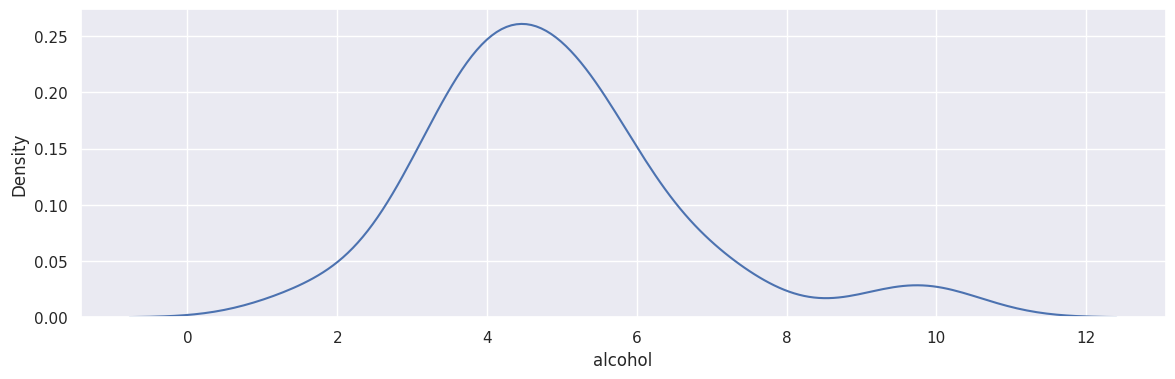

In [ ]:
# The KDE plot is a useful way to visualize the distribution of a continuous variable,
# as it can reveal the shape, central tendency, and spread of the data,
# without the need to specify the number of bins like in a histogram.
sns.kdeplot(crash_df['alcohol'])

<Axes: ylabel='Density'>

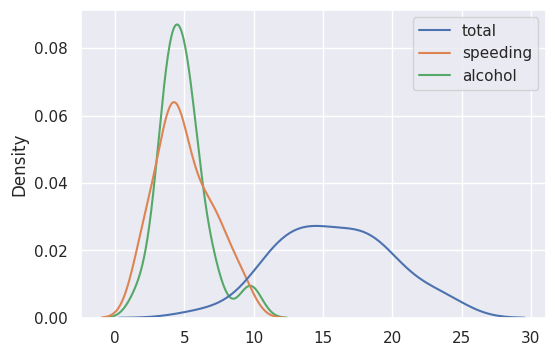

In [ ]:
# Plot distributions for several variables of a wide-form dataset:
sns.set(rc={"figure.figsize":(6, 4)})
sns.kdeplot(data=crash_df[['total', 'speeding', 'alcohol']])

Grafiquemos un jointplot desagregando a partir de una 2da variable categórica.

<Axes: xlabel='body_mass_g', ylabel='Density'>

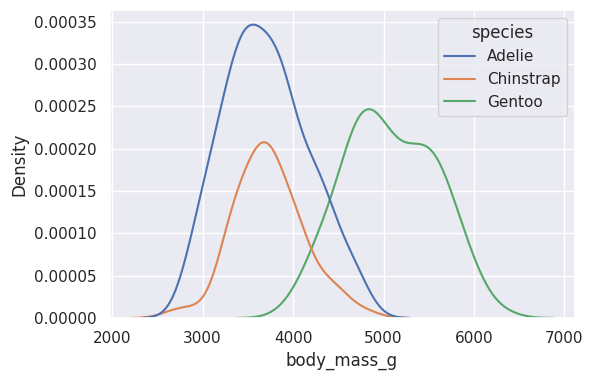

In [ ]:
# distribucion condicional
sns.kdeplot(data=df, x='body_mass_g', hue='species')

### Boxplot

<Axes: xlabel='body_mass_g'>

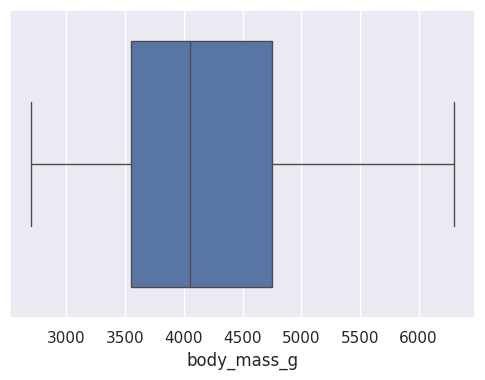

In [ ]:
sns.boxplot(data=df, x='body_mass_g')

[Text(0.5, 1.0, 'BMI across multiple species/genders')]

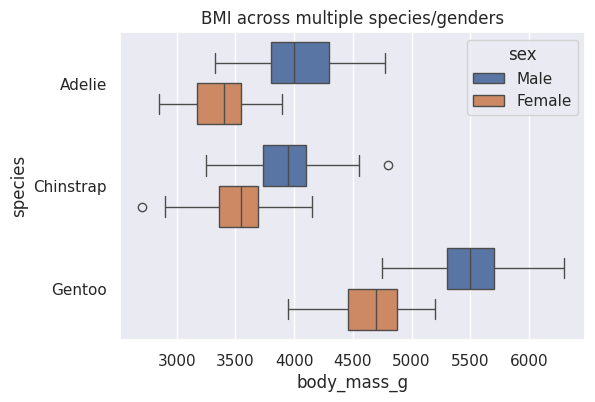

In [ ]:
sns.boxplot(data=df, x='body_mass_g',
            y='species',
            hue='sex').set(title='BMI across multiple species/genders')

# Violinplots

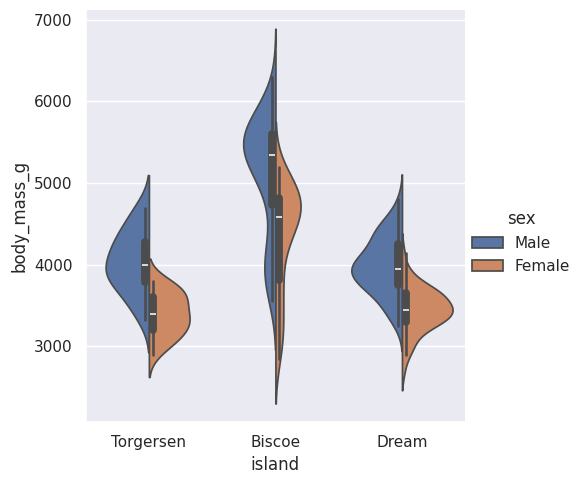

In [ ]:
sns.catplot(data=df, kind='violin', x='island', y='body_mass_g', hue='sex', split=True)

<Axes: title={'center': 'Categorización de pinguinos por IMC'}, xlabel='Isla', ylabel='IMC'>

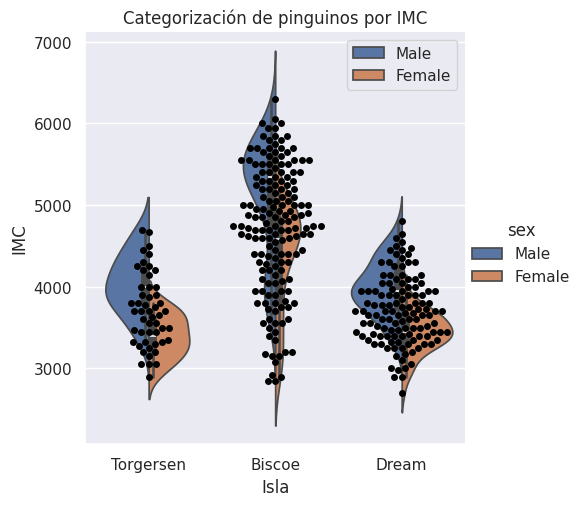

In [ ]:
ax = sns.catplot(data=df, kind='violin', x='island', y='body_mass_g', hue='sex', split=True)
ax.set(xlabel='Isla', ylabel='IMC', title='Categorización de pinguinos por IMC')

# Para agregar los puntos per se al gráfico
sns.swarmplot(x='island', y='body_mass_g', data=df, color='black')

# Barplots for time series

In [ ]:
planets = sns.load_dataset('planets')
planets

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300000,7.10,77.40,2006
1,Radial Velocity,1,874.774000,2.21,56.95,2008
2,Radial Velocity,1,763.000000,2.60,19.84,2011
3,Radial Velocity,1,326.030000,19.40,110.62,2007
4,Radial Velocity,1,516.220000,10.50,119.47,2009
...,...,...,...,...,...,...
1030,Transit,1,3.941507,NaN,172.00,2006
1031,Transit,1,2.615864,NaN,148.00,2007
1032,Transit,1,3.191524,NaN,174.00,2007
1033,Transit,1,4.125083,NaN,293.00,2008


In [ ]:
planets.describe()

,number,orbital_period,mass,distance,year
count,1035.000000,992.000000,513.000000,808.000000,1035.000000
mean,1.785507,2002.917596,2.638161,264.069282,2009.070531
std,1.240976,26014.728304,3.818617,733.116493,3.972567
min,1.000000,0.090706,0.003600,1.350000,1989.000000
25%,1.000000,5.442540,0.229000,32.560000,2007.000000
50%,1.000000,39.979500,1.260000,55.250000,2010.000000
75%,2.000000,526.005000,3.040000,178.500000,2012.000000
max,7.000000,730000.000000,25.000000,8500.000000,2014.000000


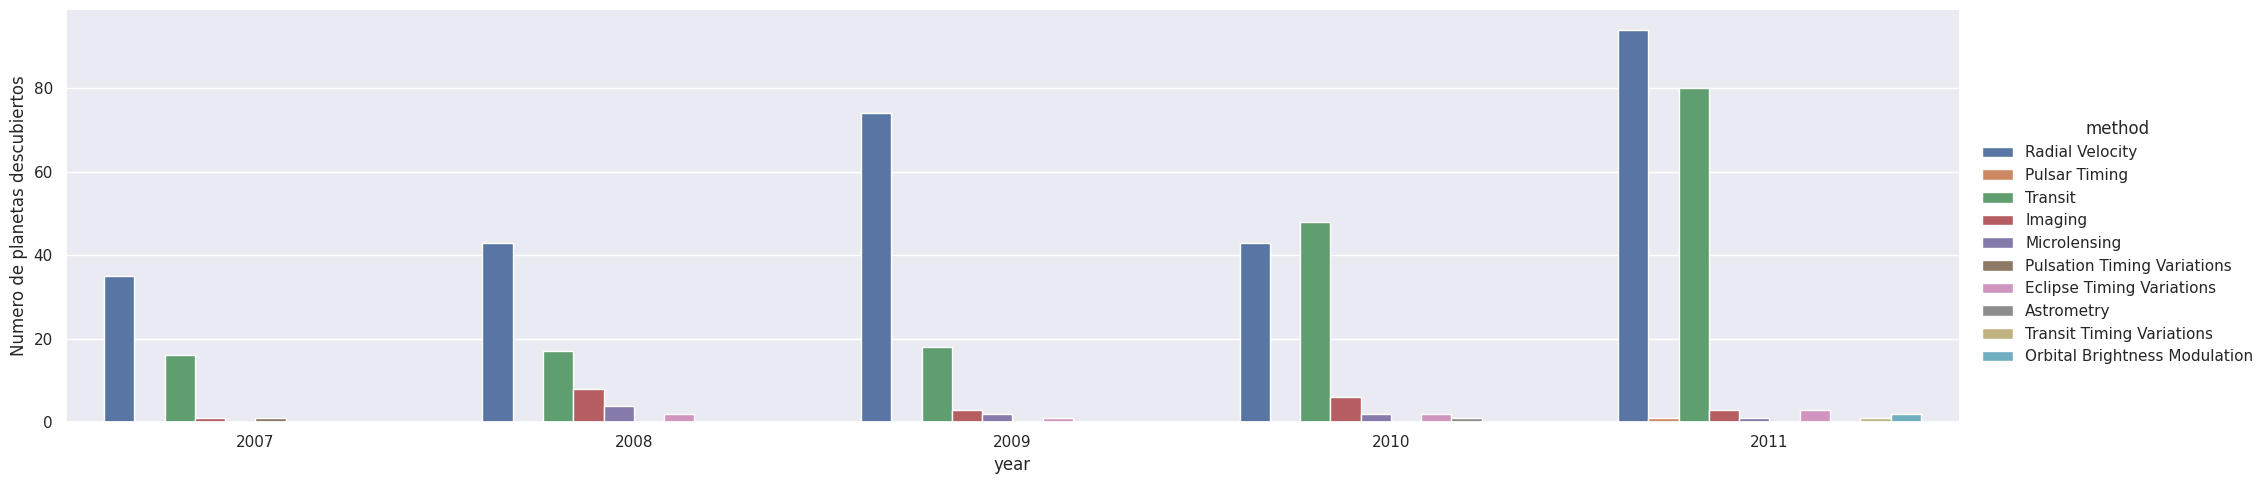

In [ ]:
# aspect: modifica la relación de aspecto entre ancho y largo
pln = sns.catplot(data=planets,
                  x='year',
                  kind='count',
                  hue='method', aspect=4, order=range(2007, 2012))
pln.set_ylabels('Numero de planetas descubiertos')

# Rugplots

<Axes: xlabel='mass', ylabel='Density'>

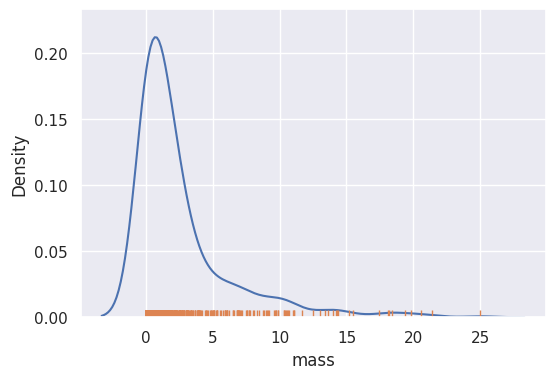

In [ ]:
sns.kdeplot(data=planets, x='mass')
sns.rugplot(data=planets, x='mass')

Agregamos "rugs" a 2 ejes en un gráfico de dispersión de puntos.

<Axes: xlabel='speeding', ylabel='alcohol'>

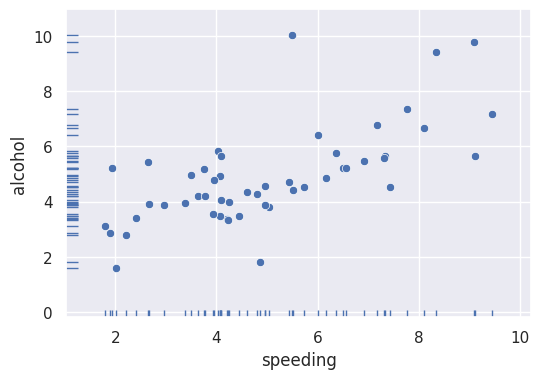

In [ ]:
sns.scatterplot(data=crash_df, x='speeding', y='alcohol')
sns.rugplot(data=crash_df, x='speeding', y='alcohol')

## Heatmaps

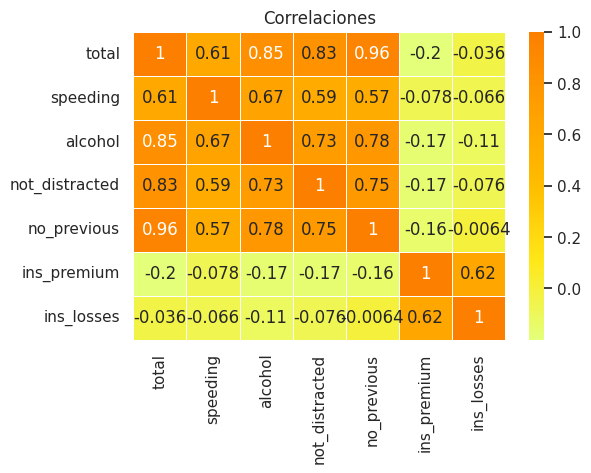

In [ ]:
hm = sns.heatmap(data=crash_df.drop('abbrev', axis=1).corr(),
                 annot=True, linewidths=.5, cmap='Wistia')
hm.set(title='Correlaciones')
plt.show()

## Pairplots
The `pairplot()` function creates a grid of scatter plots, where each plot represents the relationship between two variables in the dataset. It's particularly useful for exploring the correlations and distributions of multiple variables at once.

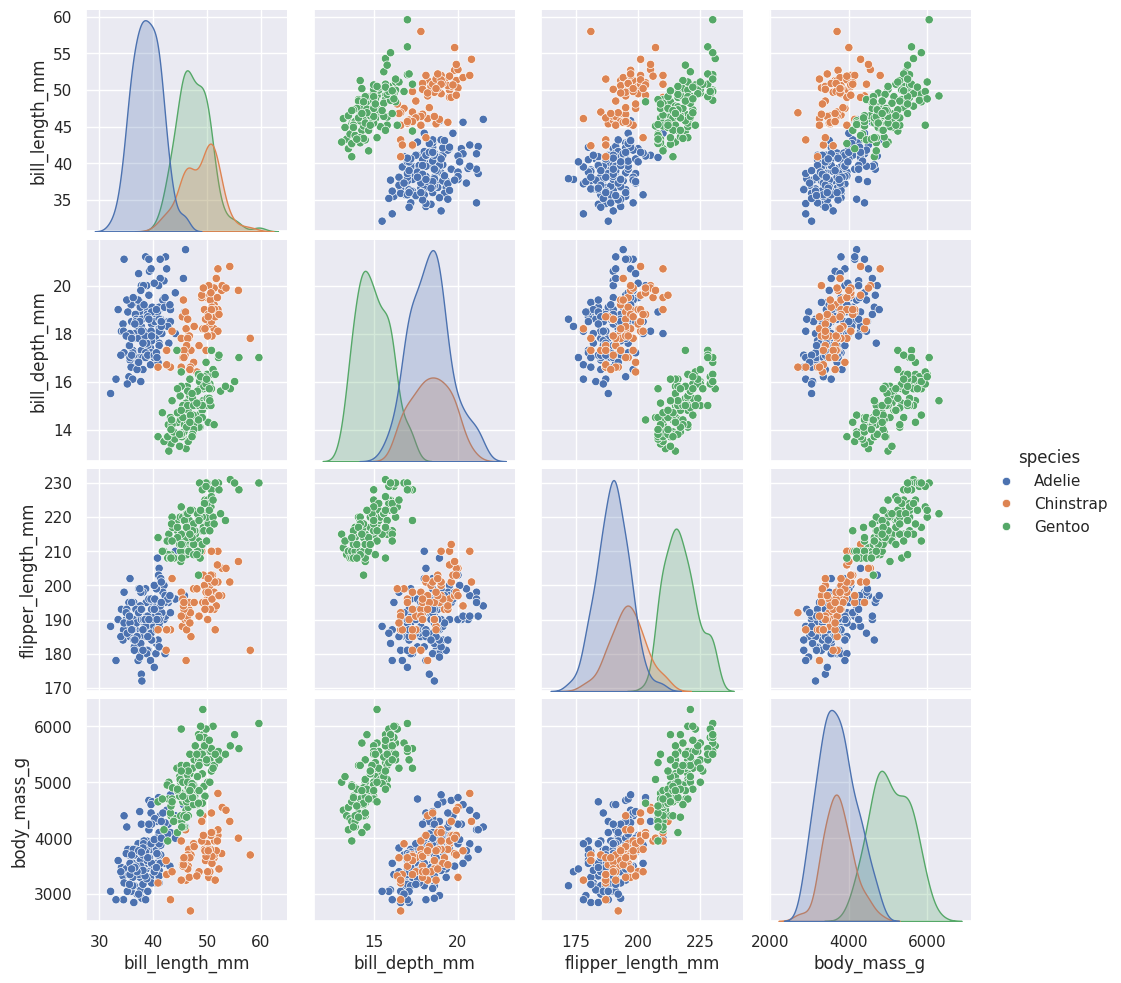

In [ ]:
sns.pairplot(df, hue='species')

## Faceted histograms
Faceted histograms, also known as grid-based histograms, are a way to create multiple histogram plots within a single figure, each displaying the distribution of a different variable or a variable split by a categorical variable.

The benefits of using faceted histograms include:

1. **Comparing distributions**: Faceted histograms make it easier to compare the distributions of a variable across different categories or groups.
2. **Exploring multivariate relationships**: By creating a grid of histograms, you can investigate how the distributions of multiple variables are related.
3. **Efficient use of space**: Faceted histograms allow you to display multiple plots in a compact and organized manner, making it easier to interpret the data.

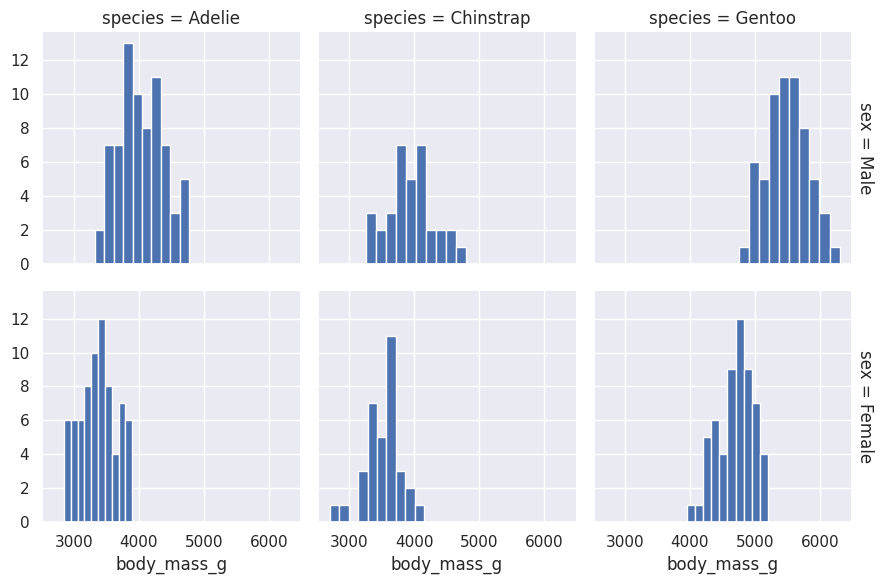

In [ ]:
grid = sns.FacetGrid(df, row='sex', col='species', margin_titles=True)
grid.map(plt.hist, 'body_mass_g')

# ACTIVIDAD

Del dataframe de contrataciones (HRDataset_v14.csv), genera en seaborn la grafica de serie de tiempo para visualizar la cantidad de contrataciones por año desagregando por sexo.

* Considera las dimensiones de la figura para que se aprecie adecuadamente
* Agrega título y etiquetas a los ejes

Posible resultado:
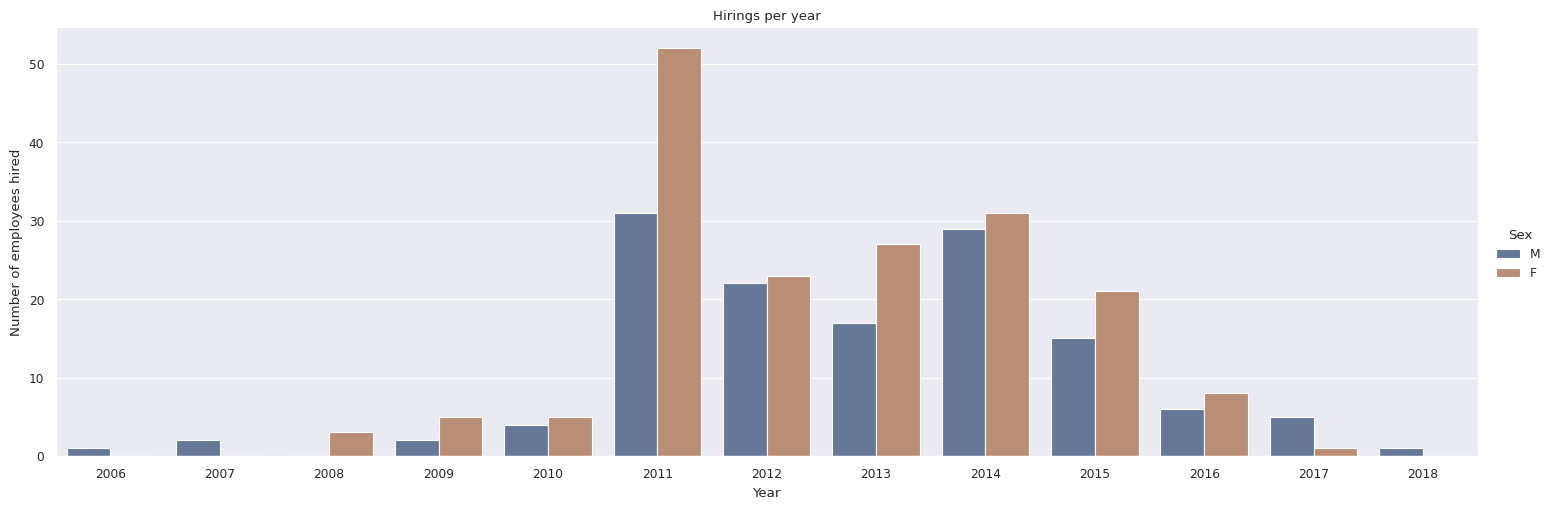